# Import the necessary packages

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import mean_absolute_error

# Read the csv file

In [2]:
df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Check for Null and Duplicate Values

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The Dataset is clean and has zero null values

In [4]:
df.duplicated().sum()

0

The dataset has no duplicate values

### Printing all the column names 

In [5]:
feature_names = df.columns
feature_names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Correlation Matrix 

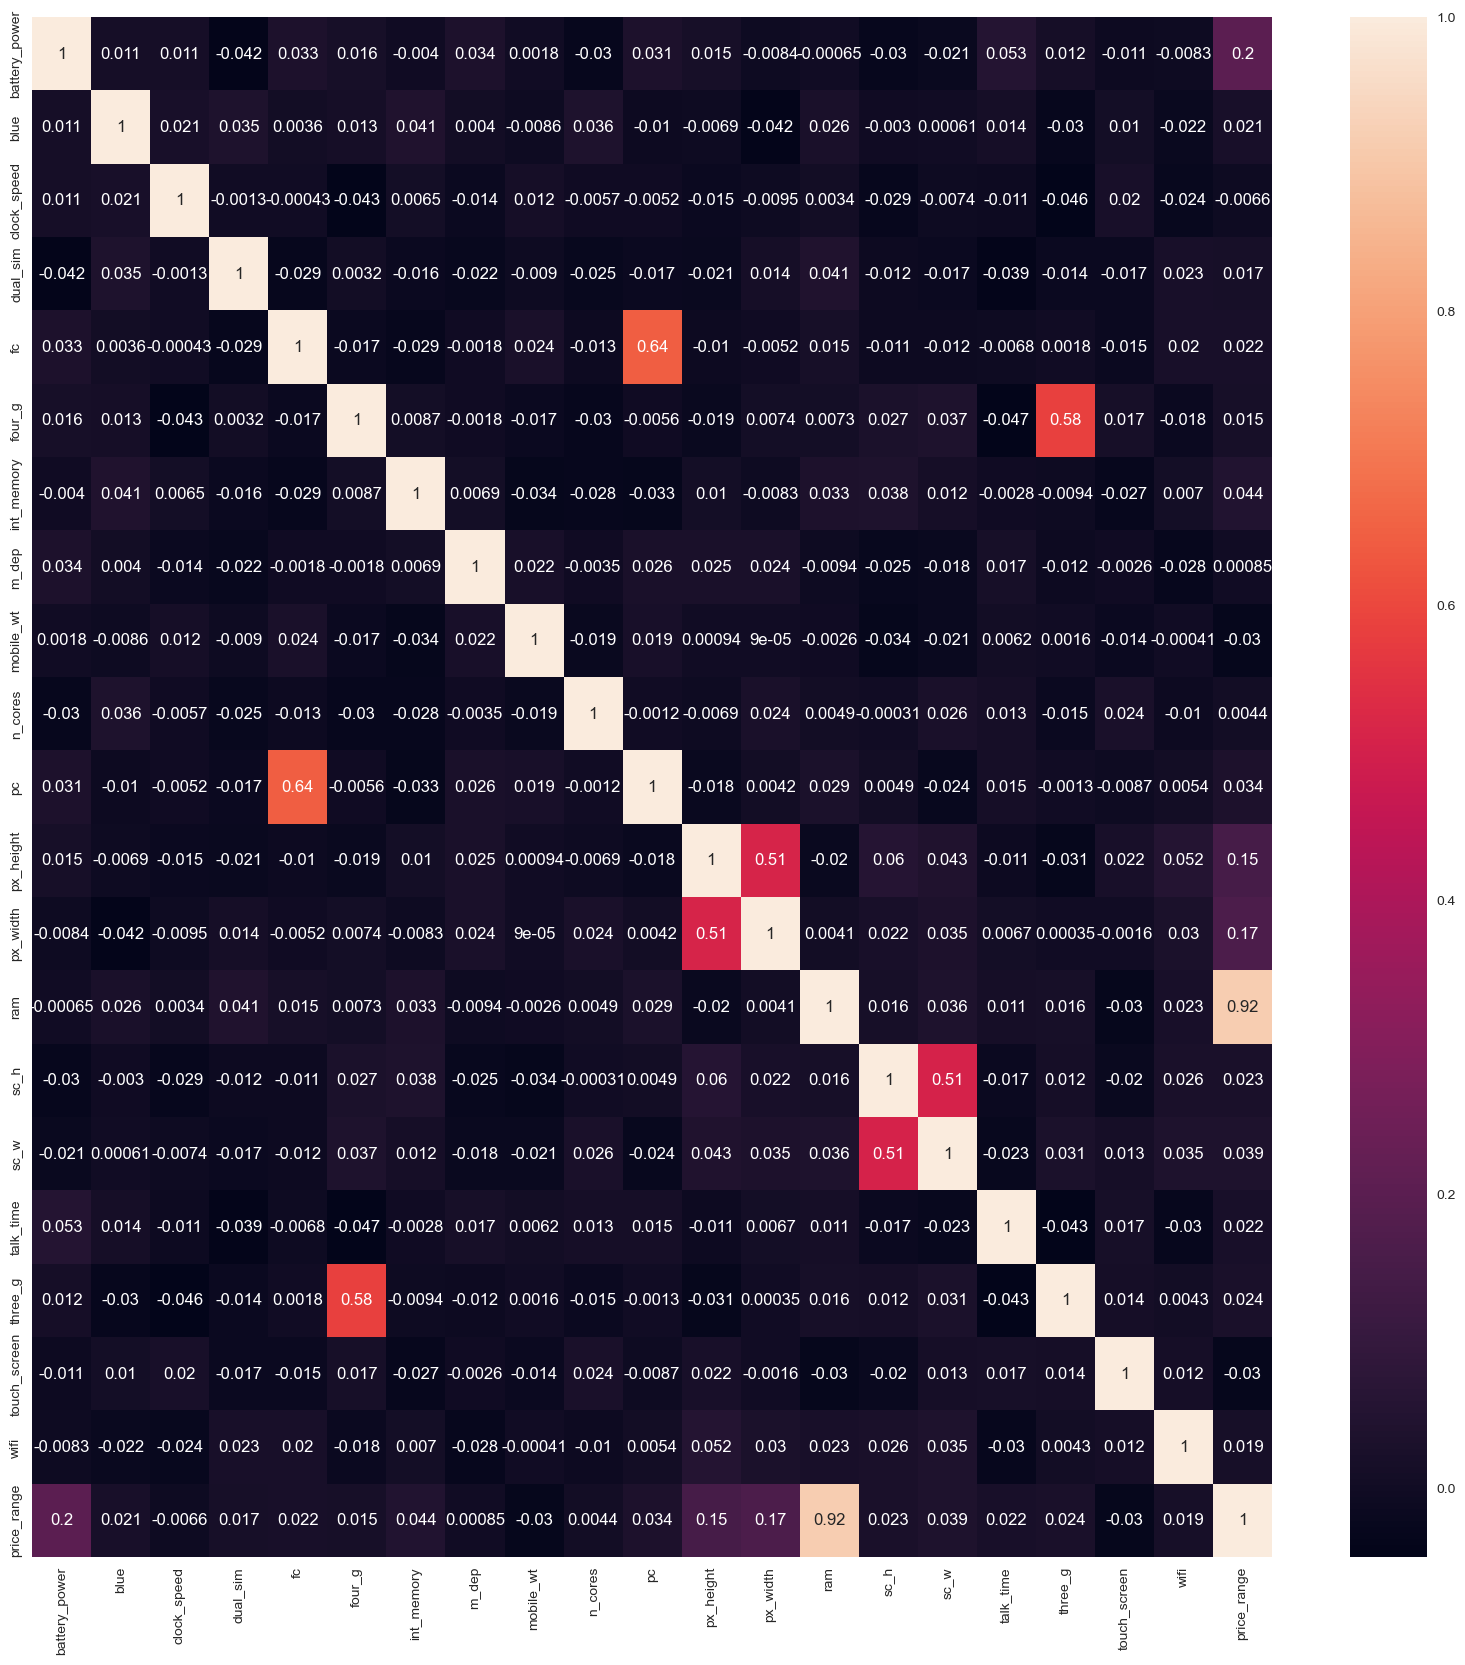

In [6]:
plt.figure(figsize=(20,20))
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

# Data Visualizations

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

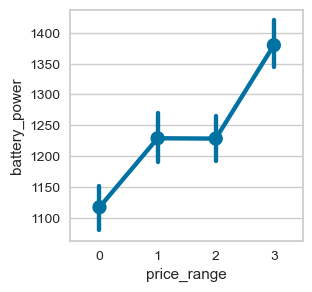

In [7]:
plt.figure(figsize=(3,3))
sns.pointplot(x='price_range',y='battery_power',data=df)


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

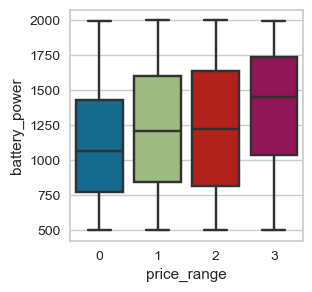

In [8]:
plt.figure(figsize=(3,3))
sns.boxplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

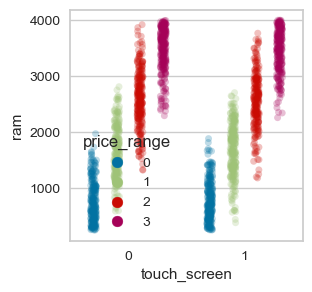

In [9]:
plt.figure(figsize=(3,3))
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1,s=5)

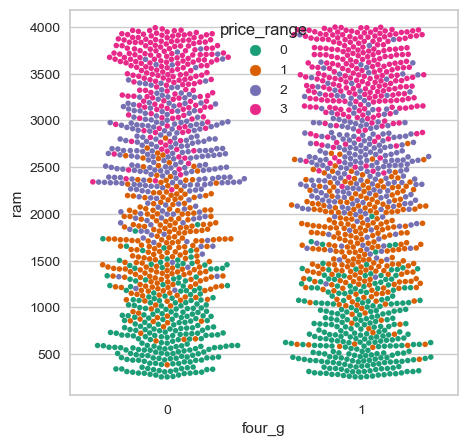

In [10]:
f, ax = plt.subplots(figsize=(5, 5))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df,s=4)
ax=sns.set(style="darkgrid")

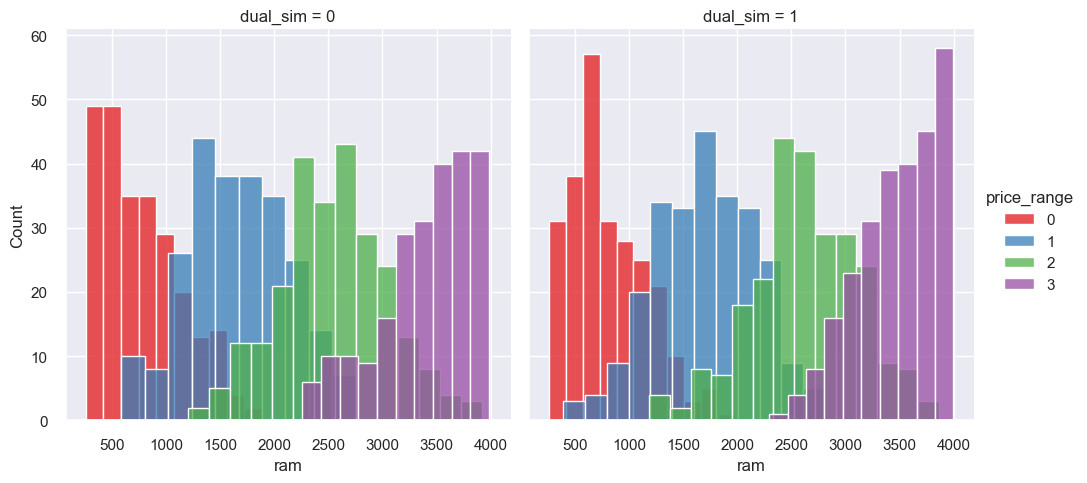

In [11]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.histplot, "ram").add_legend())

In [12]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (2000, 21)


### Features and Labels Dataset

In [13]:
train_x = df.iloc[:,:20]
train_y = df["price_range"]

## Cross-Validation Split 

In [14]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.20,random_state=123,stratify=train_y)
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1849,1786,0,1.2,0,11,0,61,0.1,123,3,14,74,865,3033,14,11,17,0,1,0
1866,907,1,2.6,1,7,0,44,0.2,160,3,12,144,896,3911,13,6,8,0,0,0
908,1254,0,1.7,0,0,1,45,0.4,146,3,3,1571,1956,606,7,2,2,1,1,1
614,539,1,0.6,1,9,0,21,0.1,145,7,14,551,599,3597,14,5,9,0,0,0
1628,999,0,2.6,1,11,1,56,1.0,165,4,13,342,1641,3083,8,4,11,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,1030,0,1.6,1,3,1,58,0.2,138,6,20,1111,1812,2858,6,2,18,1,1,1
407,652,1,2.4,1,9,1,17,0.7,173,5,11,77,559,1974,12,10,12,1,0,0
474,1968,0,0.9,0,0,0,22,0.8,115,3,7,861,1259,2323,9,8,7,0,0,1
1234,578,1,0.5,0,9,1,62,0.3,170,5,13,626,1134,2977,15,12,5,1,1,1


In [15]:
y_train

1849    3
1866    3
908     1
614     2
1628    2
       ..
759     3
407     0
474     2
1234    2
1679    3
Name: price_range, Length: 1600, dtype: int64

## Feature Scaling - Standardization 

Standardization is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of each attribute becomes zero, and the resultant distribution has a unit standard deviation.

In [16]:
ss = StandardScaler()
x_train= ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Class Imbalancement

Balancing a dataset makes training a model easier because it helps prevent the model from becoming biassed towards one class

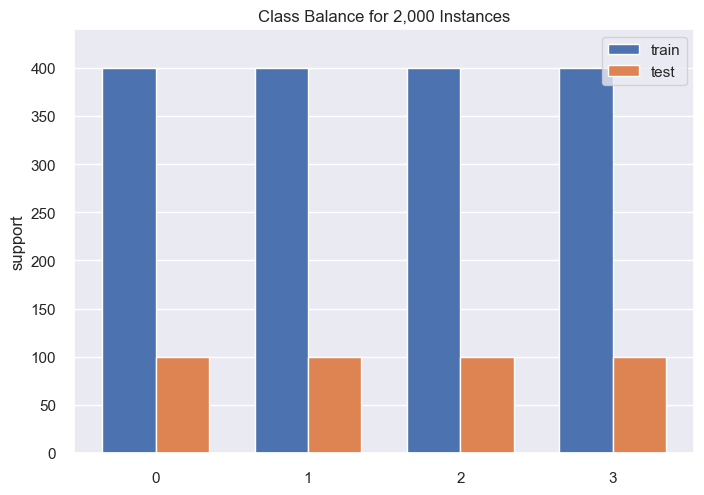

<AxesSubplot:title={'center':'Class Balance for 2,000 Instances'}, ylabel='support'>

In [17]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

All the classes are balanced in the train and test datasets 

## Check for multicollinearity

Multicollinearity is when independent variables in a regression model are correlated

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif['features']=df.drop('price_range',axis = 1).columns
vif

,vif,features
0,1.014974,battery_power
1,1.016329,blue
2,1.006105,clock_speed
3,1.010129,dual_sim
4,1.730436,fc
5,1.500733,four_g
6,1.011786,int_memory
7,1.009014,m_dep
8,1.009292,mobile_wt
9,1.009795,n_cores


Since VIF is less than 5.
There is no multicollinearity.

# Fitting the Models

I have taken: Logistic Regression
    , SVM
    , LDA
    , Decision Tree
    , Random Forest 
     and KNearestNeighbor

#### Logistic Regression

Training Accuracy: 97.6875
Testing Accuracy: 96.25
Testing MAE: 3.75
[[ 99   4   0   0]
 [  1  94   4   0]
 [  0   2  92   0]
 [  0   0   4 100]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       103
           1       0.94      0.95      0.94        99
           2       0.92      0.98      0.95        94
           3       1.00      0.96      0.98       104

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



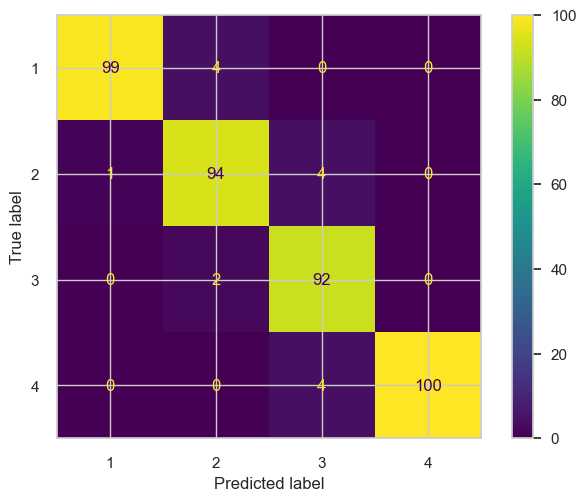

In [31]:
lgr = LogisticRegression(solver='lbfgs', max_iter=50)
# lgr = LogisticRegression(penalty='l2',C=0.1)
lgr.fit(x_train,y_train)
test_pred=lgr.predict(x_test)
train_pred = lgr.predict(x_train)

acc_lgr = accuracy_score(test_pred,y_test)
mae_lgr = mean_absolute_error(y_test, test_pred)

print(f"Training Accuracy: {accuracy_score(train_pred,y_train)*100}")
print(f"Testing Accuracy: {accuracy_score(test_pred,y_test)*100}")
print(f"Testing MAE: {mean_absolute_error(y_test, test_pred)*100}")

# sklearn.metrics.
print(f"{confusion_matrix(test_pred,y_test)}")
print(f"{classification_report(test_pred,y_test)}")
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_pred,y_test), display_labels = [1,2,3,4])
cm_display.plot()
plt.show()

#### K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# sqrt(21)/n = k 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
test_pred=knn.predict(x_test)
train_pred = knn.predict(x_train)

acc_knn = accuracy_score(test_pred,y_test)
mae_knn = mean_absolute_error(y_test, test_pred)


print(f"Training Accuracy: {accuracy_score(train_pred,y_train)*100}")
print(f"Testing Accuracy: {accuracy_score(test_pred,y_test)*100}")
print(f"Testing MAE: {mean_absolute_error(y_test, test_pred)*100}")

print(f"{confusion_matrix(test_pred,y_test)}")
print(f"{classification_report(test_pred,y_test)}")


Training Accuracy: 71.375
Testing Accuracy: 44.5
Testing MAE: 73.75
[[74 43 25  9]
 [20 38 38 20]
 [ 5 16 26 31]
 [ 1  3 11 40]]
              precision    recall  f1-score   support

           0       0.74      0.49      0.59       151
           1       0.38      0.33      0.35       116
           2       0.26      0.33      0.29        78
           3       0.40      0.73      0.52        55

    accuracy                           0.45       400
   macro avg       0.45      0.47      0.44       400
weighted avg       0.50      0.45      0.45       400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Support Vector Classification

In [21]:
svc = SVC()
svc.fit(x_train,y_train)
test_pred=svc.predict(x_test)
train_pred = svc.predict(x_train)

acc_svc = accuracy_score(test_pred,y_test)
mae_svc = mean_absolute_error(y_test, test_pred)


print(f"Training Accuracy: {accuracy_score(train_pred,y_train)*100}")
print(f"Testing Accuracy: {accuracy_score(test_pred,y_test)*100}")
print(f"Testing MAE: {mean_absolute_error(y_test, test_pred)*100}")

print(f"{confusion_matrix(test_pred,y_test)}")
print(f"{classification_report(test_pred,y_test)}")


Training Accuracy: 98.5
Testing Accuracy: 85.25
Testing MAE: 14.75
[[91  9  0  0]
 [ 9 82 14  0]
 [ 0  9 81 13]
 [ 0  0  5 87]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.82      0.78      0.80       105
           2       0.81      0.79      0.80       103
           3       0.87      0.95      0.91        92

    accuracy                           0.85       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.85      0.85      0.85       400



#### Linear Descriminant Analysis 

In [22]:
lda = LDA(n_components = 1)
lda.fit(x_train,y_train)
test_pred=lda.predict(x_test)
train_pred = lda.predict(x_train)

acc_lda = accuracy_score(test_pred,y_test)
mae_lda = mean_absolute_error(y_test, test_pred)


print(f"Training Accuracy: {accuracy_score(train_pred,y_train)*100}")
print(f"Testing Accuracy: {accuracy_score(test_pred,y_test)*100}")
print(f"Testing MAE: {mean_absolute_error(y_test, test_pred)*100}")

print(f"{confusion_matrix(test_pred,y_test)}")
print(f"{classification_report(test_pred,y_test)}")

Training Accuracy: 95.3125
Testing Accuracy: 93.0
Testing MAE: 7.000000000000001
[[97  3  0  0]
 [ 3 93 11  0]
 [ 0  4 89  7]
 [ 0  0  0 93]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.93      0.87      0.90       107
           2       0.89      0.89      0.89       100
           3       0.93      1.00      0.96        93

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



#### Decision Trees

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
test_pred=decision_tree.predict(x_test)
train_pred = decision_tree.predict(x_train)

acc_dt = accuracy_score(test_pred,y_test)
mae_dt = mean_absolute_error(y_test, test_pred)


print(f"Training Accuracy: {accuracy_score(train_pred,y_train)*100}")
print(f"Testing Accuracy: {accuracy_score(test_pred,y_test)*100}")
print(f"Testing MAE: {mean_absolute_error(y_test, test_pred)*100}")

print(f"{confusion_matrix(test_pred,y_test)}")
print(f"{classification_report(test_pred,y_test)}")

Training Accuracy: 100.0
Testing Accuracy: 82.0
Testing MAE: 18.25
[[91 12  0  0]
 [ 9 76 12  1]
 [ 0 12 75 13]
 [ 0  0 13 86]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       103
           1       0.76      0.78      0.77        98
           2       0.75      0.75      0.75       100
           3       0.86      0.87      0.86        99

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



#### Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators=200,min_samples_split=4)
random_forest.fit(x_train,y_train)
test_pred=random_forest.predict(x_test)
train_pred = random_forest.predict(x_train)


acc_rf = accuracy_score(test_pred,y_test)
mae_rf = mean_absolute_error(y_test, test_pred)


print(f"Training Accuracy: {accuracy_score(train_pred,y_train)*100}")
print(f"Testing Accuracy: {accuracy_score(test_pred,y_test)*100}")
print(f"Testing MAE: {mean_absolute_error(y_test, test_pred)*100}")

print(f"{confusion_matrix(test_pred,y_test)}")
print(f"{classification_report(test_pred,y_test)}")

Training Accuracy: 100.0
Testing Accuracy: 87.25
Testing MAE: 12.75
[[96 13  0  0]
 [ 4 79 14  0]
 [ 0  8 83  9]
 [ 0  0  3 91]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       109
           1       0.79      0.81      0.80        97
           2       0.83      0.83      0.83       100
           3       0.91      0.97      0.94        94

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



Dataframe cotaining each model and thier respective accuracy

In [25]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'SVC', 'Lda', 'Decision Tree Classifier','Random Forest Classifier',"KNN"] ,
   'Score': [acc_lgr,acc_svc,acc_lda,acc_dt,acc_rf,acc_knn], 'MAE': [mae_lgr,mae_svc,mae_lda,mae_dt,mae_rf,mae_knn]})


# Print the data
models.sort_values(by='Score',ascending = False)

,Model,Score,MAE
0,Logistic Regression,0.9625,0.0375
2,Lda,0.9300,0.0700
4,Random Forest Classifier,0.8725,0.1275
1,SVC,0.8525,0.1475
3,Decision Tree Classifier,0.8200,0.1825
5,KNN,0.4450,0.7375


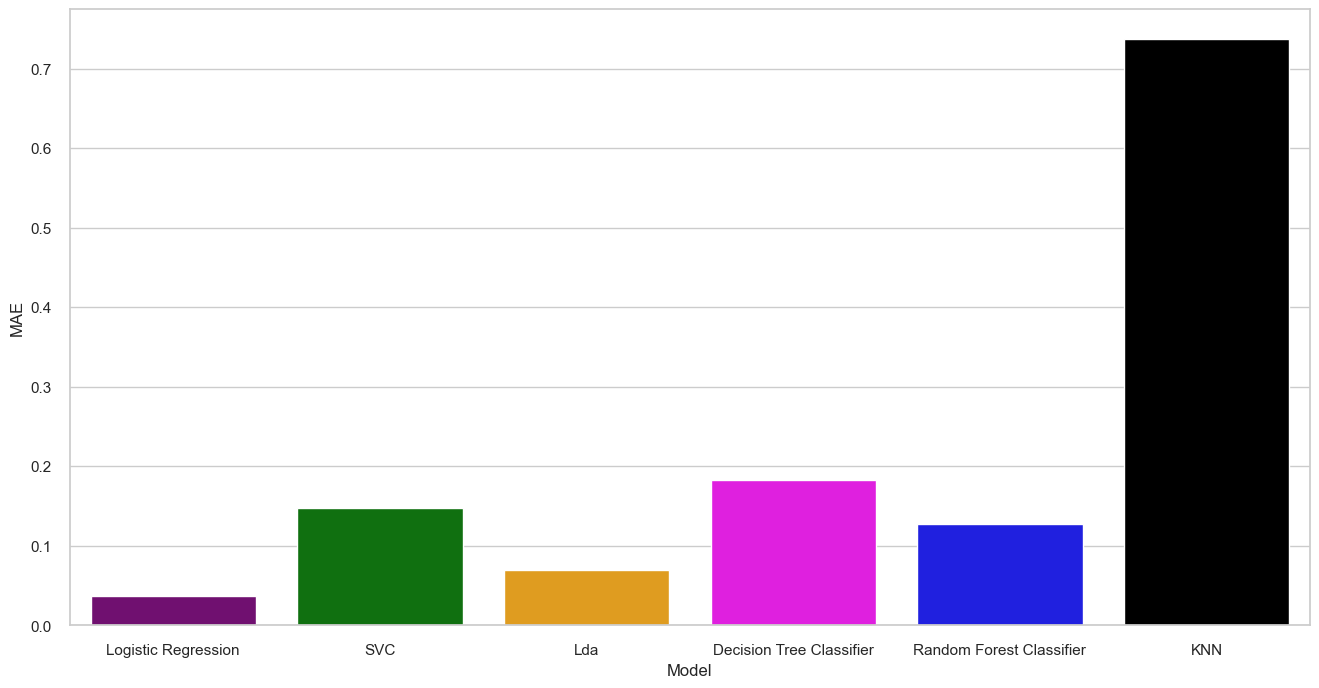

In [26]:
colors = ["purple", "green", "orange", "magenta","blue","black"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['MAE'], palette=colors )
plt.show()

Selecting Logistic Regression since it has the lowest MAE (Mean Absolute Error) 
MAE measures the average absolute difference between the predicted and actual values. Since your target values are integers between 1 to 4, the MAE will give you an idea of how far off your predictions are on average from the true values.

## Saving the svc model to be used in making predictions 

filename = 'finalized.pickle'
joblib.dump(svc, filename)